30/11/2020

DUBOIS Thomas

manipulation classes, numpy, time, random, matplotlib

L'objectif étant de créer un code modélisant un rubiks cube, le modifiant puis le résolvant automatiquement !

In [1476]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
import random as rdm
import time
from math import cos, sin, radians

Classe d'une face de rubiks cube :

In [1454]:
class Face_RubiksCube3x3:
    """Classe définissant une face de rubiks cube défini par :
    - grille   : un tableau 3x3 representant les couleurs de la face
    - position : (f : front, b : back, l : left, r : right, u : up, d : down)
    - """

    
    def __init__(self,color):
        self.m_grid   = np.array([[color,color,color],
                                  [color,color,color],
                                  [color,color,color]],dtype=str)
        self.m_color  = color

    def __str__(self):
        """Méthode permettant d'afficher plus joliment notre objet"""
        return self.m_grid[0,0]+self.m_grid[0,1]+self.m_grid[0,2]+"\n"+\
               self.m_grid[1,0]+self.m_grid[1,1]+self.m_grid[1,2]+"\n"+\
               self.m_grid[2,0]+self.m_grid[2,1]+self.m_grid[2,2]+"\n"


    def countColor(self,color):
        return np.count_nonzero(self.m_grid == color)
    
    def positionColor(self,color):
        '''Ressort 1 tableau de 2 tableau (un pour x un pour y)
        donnant la position des couleurs'''
        return np.where(self.m_grid == color)


    def setRow(self,position,newLine):
        self.m_grid[position] = newLine

    def setCol(self,position,newCol):
        self.m_grid[0,position] = newCol[0]
        self.m_grid[1,position] = newCol[1]
        self.m_grid[2,position] = newCol[2]
    
    def setValue(self,x,y,val):
        self.m_grid[x,y] = val
        
    def getValue(self,x,y):
        return self.m_grid[x,y]
        
    def getColor(self):
        return self.m_grid[1,1]

    def getRow(self,position):
        return deepcopy(self.m_grid[position])

    def getCol(self,position):
        res = []
        res.append(self.m_grid[0,position])
        res.append(self.m_grid[1,position])
        res.append(self.m_grid[2,position])
        return deepcopy(res)
    
    def getFace(self):
        return self.m_grid
    
    def rotClockwise(self,nb):
        for i in range(nb):
            row0 = self.getRow(0)
            row2 = self.getRow(2)
            col0 = self.getCol(0)
            col2 = self.getCol(2)

            self.setValue(0,1,col0[1])
            self.setValue(2,1,col2[1])
            self.setCol(0,row2)
            self.setCol(2,row0)

    def rotAnticlockwise(self,nb):
        
        for i in range(nb):

            row0 = self.getRow(0)
            row2 = self.getRow(2)
            col0 = self.getCol(0)
            col2 = self.getCol(2)

            self.setValue(1,0,row0[1])
            self.setValue(1,2,row2[1])
            self.setRow(0,col2)
            self.setRow(2,col0)
    
    def checkFaceResolu(self):
        res = True
        for i in range(3):
            for j in range(3):
                if self.m_grid[i,j] != self.m_grid[1,1]:
                    res = False
        return res



        
        

In [1079]:
a = Face_RubiksCube3x3('b')
print(a)
a.set_col(0,['r','g','d'])
a.set_col(2,['a','x','t'])
print(a)
a.rot_anticlockwise(1)
print(a)
a.rot_clockwise(1)
print(a)

bbb
bbb
bbb

rba
gbx
dbt

axt
bbb
rgd

rba
gbx
dbt



Classe d'un rubiks cube :

In [1675]:
class RubiksCube3x3: # Définition de notre Rubiks Cube 3x3
    """Classe définissant un rubiks cube défini par :
    - m_FrontFace : type Face_RubiksCube3x3
    - m_BackFace : type Face_RubiksCube3x3
    - m_UpFace : type Face_RubiksCube3x3
    - m_DownFace : type Face_RubiksCube3x3
    - m_LeftFace : type Face_RubiksCube3x3
    - m_RightFace : type Face_RubiksCube3x3

    """

    #----------------------#
    #                      #
    # creation d'un rubiks #
    #                      #
    #----------------------#
    def __init__(self,frontFace='w',upFace='r'):
        ''' frontFace : choix couleur de la face de devant
            -> par default 'w' : white
            upFace    : choix couleur de la face du dessus
            -> par default : red
        '''

        if frontFace == 'w' or frontFace == 'y':
            # si == y on construit comme si
            # ==w et on inversera devant derriere et droite gauche !
            # gagne un pacquet de lignes de codes et perds quasi pas de temps
            
            if upFace == 'g':
                tab = ['g','o','b','r']
            elif upFace == 'o':
                tab = ['o','b','r','g']
            elif upFace == 'b':
                tab = ['b','r','g','o']
            else :
                tab = ['r','g','o','b']
            
            if frontFace == 'y': # sinon
                self.m_FrontFace = Face_RubiksCube3x3('y')
                self.m_BackFace  = Face_RubiksCube3x3('w')
                self.m_UpFace, self.m_LeftFace, self.m_DownFace, self.m_RightFace\
                = [Face_RubiksCube3x3(tab[0]),Face_RubiksCube3x3(tab[1]),
                   Face_RubiksCube3x3(tab[2]),Face_RubiksCube3x3(tab[3])]
                
            else :
                self.m_FrontFace = Face_RubiksCube3x3('w')
                self.m_BackFace  = Face_RubiksCube3x3('y')
                self.m_UpFace, self.m_RightFace, self.m_DownFace, self.m_LeftFace\
                = [Face_RubiksCube3x3(tab[0]),Face_RubiksCube3x3(tab[1]),
                   Face_RubiksCube3x3(tab[2]),Face_RubiksCube3x3(tab[3])]
                
        elif frontFace == 'b' or frontFace == 'g':
            #on fait comme si bleu
            if upFace == 'r':
                tab = ['r','w','o','y']
            elif upFace == 'w':
                tab = ['w','o','y','r']
            elif upFace == 'o':
                tab = ['o','y','r','w']
            else :
                tab = ['y','r','w','o']
            
            #sinon on inverse
            if frontFace == 'g':
                self.m_FrontFace = Face_RubiksCube3x3('g')
                self.m_BackFace  = Face_RubiksCube3x3('b')
                self.m_UpFace, self.m_LeftFace, self.m_DownFace, self.m_RightFace\
                = [Face_RubiksCube3x3(tab[0]),Face_RubiksCube3x3(tab[1]),
                   Face_RubiksCube3x3(tab[2]),Face_RubiksCube3x3(tab[3])]   
            else :
                self.m_FrontFace = Face_RubiksCube3x3('b')
                self.m_BackFace  = Face_RubiksCube3x3('g')
                self.m_UpFace, self.m_RightFace, self.m_DownFace, self.m_LeftFace\
                = [Face_RubiksCube3x3(tab[0]),Face_RubiksCube3x3(tab[1]),
                   Face_RubiksCube3x3(tab[2]),Face_RubiksCube3x3(tab[3])]
                
        elif frontFace == 'r' or frontFace == 'o':
            #on fait comme si rouge
            if upFace == 'g':
                tab = ['g','w','b','y']
            elif upFace == 'w':
                tab = ['w','b','y','g']
            elif upFace == 'b':
                tab = ['b','y','g','w']
            else :
                tab = ['y','g','w','b']
            
            #sinon on inverse
            if frontFace == 'o':
                self.m_FrontFace = Face_RubiksCube3x3('o')
                self.m_BackFace  = Face_RubiksCube3x3('r')
                self.m_UpFace, self.m_LeftFace, self.m_DownFace, self.m_RightFace\
                = [Face_RubiksCube3x3(tab[0]),Face_RubiksCube3x3(tab[1]),
                   Face_RubiksCube3x3(tab[2]),Face_RubiksCube3x3(tab[3])]
            else :
                self.m_FrontFace = Face_RubiksCube3x3('r')
                self.m_BackFace  = Face_RubiksCube3x3('o')
                self.m_UpFace, self.m_RightFace, self.m_DownFace, self.m_LeftFace\
                = [Face_RubiksCube3x3(tab[0]),Face_RubiksCube3x3(tab[1]),
                   Face_RubiksCube3x3(tab[2]),Face_RubiksCube3x3(tab[3])]
                
        else : #tout autre cas
            tab = ['r','g','o','b']
            self.m_FrontFace = Face_RubiksCube3x3('w')
            self.m_BackFace  = Face_RubiksCube3x3('y')
            self.m_UpFace, self.m_RightFace, self.m_DownFace, self.m_LeftFace\
                = [Face_RubiksCube3x3(tab[0]),Face_RubiksCube3x3(tab[1]),
                   Face_RubiksCube3x3(tab[2]),Face_RubiksCube3x3(tab[3])]

        
    def modifRubiks(self,tab):
        '''
        Permet de changer le rubiks. Utiliser pour debuguer.
        
        tab = list contenant les faces du rubiks cube

        '''
        [self.m_FrontFace, self.m_BackFace,
         self.m_UpFace   , self.m_DownFace,
         self.m_RightFace, self.m_LeftFace] = tab

    def returnRubiks(self):
        '''
        Retourne un tableau contenant les faces du rubiks cube.
        Utilisé pour debuguer
        '''
        return [self.m_FrontFace, self.m_BackFace,
                self.m_UpFace   , self.m_DownFace,
                self.m_RightFace, self.m_LeftFace]
        
    def returnRubiksDeepcopy(self):
        '''
        Retourne un tableau contenant les faces du rubiks cube.
        Utilise deepcopy (car les faces contiennent des tableaux modifiés)
        Utilisé pour debuguer. 
        '''
        return [deepcopy(self.m_FrontFace), deepcopy(self.m_BackFace),
                deepcopy(self.m_UpFace)   , deepcopy(self.m_DownFace),
                deepcopy(self.m_RightFace), deepcopy(self.m_LeftFace)]
    
    def plotRubiks2D(self,title='Notre Rubiks'):
        '''
        Plot en 2D notre Rubiks Cube.
        title est le titre affiché, par défault : 'Notre Rubiks'.
        '''
        
        fig, ax = plt.subplots(1,1)


        n = 3 #rubiks 3x3
        x = []
        y = []
        dict_colors = {'r' :'red','o' :'orange',
                       'b' :'blue','g' :'green',
                       'w' :'black','y' :'yellow'}
        for face in [[0,0],[1,0],[0,1],[-1,0],[0,-1],[0,-2]]:
            for j in range(0,n):
                for i in range(0, n):
                    x.append(i+face[0]*4)
                    y.append(-j+face[1]*4)
                    
        
        size   = [150 for c in x]   #thickness of points
        colors1 = [dict_colors[c] for c in self.m_FrontFace.getFace().reshape(9)]
        colors2 = [dict_colors[c] for c in self.m_RightFace.getFace().reshape(9)]
        colors3 = [dict_colors[c] for c in self.m_UpFace.getFace().reshape(9)]
        colors4 = [dict_colors[c] for c in self.m_LeftFace.getFace().reshape(9)]
        colors5 = [dict_colors[c] for c in self.m_DownFace.getFace().reshape(9)]
        colors6 = [dict_colors[c] for c in self.m_BackFace.getFace().reshape(9)]

        colors = np.concatenate([colors1,colors2, colors3, colors4, colors5, colors6])
        ax.set_title(title)
        ax.scatter(x, y, s=size, c=colors) #plot
        
    def plotRubiks3D(self,title='Notre Rubiks'):
        '''
        Plot en 3D notre Rubiks Cube.
        title est le titre affiché, par défault : 'Notre Rubiks'.
        '''
        
        fig, ax = plt.subplots(1,1)


        n = 3 #rubiks 3x3
        x = []
        y = []
        dict_colors = {'r' :'red',  'o' :'orange',
                       'b' :'blue', 'g' :'green',
                       'w' :'black','y' :'yellow'}
        #front face
        for j in range(0,n):
            for i in range(0, n):
                x.append(i+1)
                y.append(j+1)
        #right face
        for j in range(0,n):
            for i in range(0, n):
                x.append(n+cos(radians(40))*0.5*i+sin(radians(40))*0.5*i)
                y.append(1+0.15+j+cos(radians(40))*0.5*i+sin(radians(40))*0.5*i)
        
        #up face
        for j in range(0,n):
            for i in range(0, n):
                x.append(1+i+cos(radians(40))*0.5*j+sin(radians(40))*0.5*j)
                y.append(n+0.3+cos(radians(40))*0.5*j+sin(radians(40))*0.5*j)
        
        
        size   = [150 for c in x]   #epaisseur du point
        
        colors1 = deepcopy(self.m_FrontFace.getFace())
        colors2 = deepcopy(self.m_RightFace.getFace())
        colors3 = deepcopy(self.m_UpFace.getFace())
        colors1 = np.array([colors1[2],colors1[1],colors1[0]])
        colors2 = np.array([colors2[2],colors2[1],colors2[0]])
        colors3 = np.array([colors3[2],colors3[1],colors3[0]])
        colors1 = [dict_colors[c] for c in colors1.reshape(9)]
        colors2 = [dict_colors[c] for c in colors2.reshape(9)]
        colors3 = [dict_colors[c] for c in colors3.reshape(9)]
        


        colors = np.concatenate([colors1,colors2,colors3])
        ax.set_title(title+' en 3D')
        ax.scatter(x, y, s=size, c=colors) #on plot
          
    def reShapePlot3D(tab, tabColor):
        for i in range(9):
            if tabColor == 'red':
                pass
                
    def plotRubiks3D2(self,title='Notre Rubiks'):
        '''
        Plot en 3D notre Rubiks Cube.
        title est le titre affiché, par défault : 'Notre Rubiks'.
                '''
        n = 3 #rubiks 3x3
        x1 = []
        y1 = []
        dict_colors = {'r' :'red',  'o' :'orange',
                       'b' :'blue', 'g' :'green',
                       'w' :'black','y' :'yellow'}
        
        #front face
        for j in range(0,n):
            for i in range(0, n):
                x1.append(i+1)
                y1.append(j+1)
        #right face
        x2 = []
        y2 = []
        for j in range(0,n):
            for i in range(0, n):
                x2.append(n+0.2+cos(radians(90))*0.7*i+sin(radians(90))*0.7*i)
                y2.append(1+j+cos(radians(90))*0.7*i+sin(radians(90))*0.7*i)
        
        #up face
        x3 = []
        y3 = []
        for j in range(0,n):
            for i in range(0, n):
                x3.append(1+i+cos(radians(90))*0.7*j+sin(radians(90))*0.7*j)
                y3.append(n+0.3+cos(radians(90))*0.7*j+sin(radians(90))*0.7*j)
        x4 = []
        y4 = []
        #left face
        for j in range(0,n):
            for i in range(0, n):
                x4.append(i+-3)
                y4.append(j+1)
        
        x5 = []
        y5 = []
        #down face
        for j in range(0,n):
            for i in range(0, n):
                x5.append(i+1)
                y5.append(j-3)
        
        
        
        colors1 = deepcopy(self.m_FrontFace.getFace())
        colors2 = deepcopy(self.m_RightFace.getFace())
        colors3 = deepcopy(self.m_UpFace.getFace())
        colors4 = deepcopy(self.m_LeftFace.getFace())
        colors5 = deepcopy(self.m_DownFace.getFace())
        
        colors1 = np.array([colors1[2],colors1[1],colors1[0]])
        colors2 = np.array([colors2[2],colors2[1],colors2[0]])
        colors3 = np.array([colors3[2],colors3[1],colors3[0]])
        colors4 = np.array([colors4[2],colors4[1],colors4[0]])
        colors5 = np.array([colors5[2],colors5[1],colors5[0]])
        
        colors1 = [dict_colors[c] for c in colors1.reshape(9)]
        colors2 = [dict_colors[c] for c in colors2.reshape(9)]
        colors3 = [dict_colors[c] for c in colors3.reshape(9)]
        colors4 = [dict_colors[c] for c in colors4.reshape(9)]
        colors5 = [dict_colors[c] for c in colors5.reshape(9)]
        
        x1S = [x1[0]]+[x1[2]]+[x1[8]]+[x1[6]]+[x1[0]]
        y1S = [y1[0]]+[y1[2]]+[y1[8]]+[y1[6]]+[y1[0]]
        
        x2S = [x2[0]]+[x2[2]]+[x2[8]]+[x2[6]]+[x2[0]]
        y2S = [y2[0]]+[y2[2]]+[y2[8]]+[y2[6]]+[y2[0]]
        
        x3S = [x3[0]]+[x3[2]]+[x3[8]]+[x3[6]]+[x3[0]]
        y3S = [y3[0]]+[y3[2]]+[y3[8]]+[y3[6]]+[y3[0]]
        
        x4S = [x4[0]]+[x4[2]]+[x4[8]]+[x4[6]]+[x4[0]]
        y4S = [y4[0]]+[y4[2]]+[y4[8]]+[y4[6]]+[y4[0]]
        
        x5S = [x5[0]]+[x5[2]]+[x5[8]]+[x5[6]]+[x5[0]]
        y5S = [y5[0]]+[y5[2]]+[y5[8]]+[y5[6]]+[y5[0]]
        
        #plt.subplot(211)
        plt.figure(figsize = (8, 8))
        plt.plot(x1S, y1S, "k")
        plt.plot(x2S, y2S, "k")
        plt.plot(x3S, y3S, "k")
        plt.plot(x4S, y4S, "k")
        plt.plot(x5S, y5S, "k")
        plt.axis('equal')
        #plt.axis('off') 
        plt.scatter(x1+x2+x3+x4+x5, y1+y2+y3+y4+y5, s = 200, marker = 's',color = colors1+colors2+colors3+colors4+colors5)
        plt.scatter(0,2, s = 500, marker = '<', color = 'black')
        plt.scatter(2,0, s = 500, marker = 'v', color = 'black')
        plt.title(title+' en 3D')


        plt.show()
    def getFrontFace(self):
        return self.m_FrontFace
    def getBackFace(self):
        return self.m_BackFace
    def getLeftFace(self):
        return self.m_LeftFace
    def getRightFace(self):
        return self.m_RightFace
    def getUpFace(self):
        return self.m_UpFace
    def getDownFace(self):
        return self.m_DownFace
    
    #--------------------#
    # on passe aux       #
    # actions effectuées #
    # sur notre rubiks ! #
    #--------------------#
    #on va creer 12 mouvements differents : 
    # 6 verticaux  : left (l) middle (m) right (r)
    #-> sens up (u) down (d)
    # 6 horizontaux : up (u) middle (m) down (d)
    #-> sens right(r) left (l)
    
    def mvmtV(self,col,direction,nb):
        if len(direction)==2:                       #pour simplifier les calculs par la suite,
            new_direction = deepcopy(direction[1]) #on place comme convention qu'en rajoutant
            if new_direction =='u':                 #la lettre 'c' devant la direction,
                direction = 'd'                     #c'est alors la direction contraire !
            elif new_direction == 'd':              #cu = d
                direction = 'u'                     #cd = u
                                
        for i in range(nb):
            if col == 'l': #left
                if direction == 'u': #up
                    front = self.m_FrontFace.getCol(0)
                    up    = self.m_UpFace.getCol(0)
                    back  = self.m_BackFace.getCol(0)
                    down  = self.m_DownFace.getCol(0)

                    self.m_FrontFace.setCol(0,down)
                    self.m_UpFace.setCol(0,front)
                    self.m_BackFace.setCol(0,up)
                    self.m_DownFace.setCol(0,back)
                    self.m_LeftFace.rotAnticlockwise(1)
                elif direction == 'd': #down
                    front = self.m_FrontFace.getCol(0)
                    up    = self.m_UpFace.getCol(0)
                    back  = self.m_BackFace.getCol(0)
                    down  = self.m_DownFace.getCol(0)

                    self.m_FrontFace.setCol(0,up)
                    self.m_UpFace.setCol(0,back)
                    self.m_BackFace.setCol(0,down)
                    self.m_DownFace.setCol(0,front) 
                    self.m_LeftFace.rotClockwise(1)
            elif col == 'r': #right
                if direction == 'u': #up
                    front = self.m_FrontFace.getCol(2)
                    up    = self.m_UpFace.getCol(2)
                    back  = self.m_BackFace.getCol(2)
                    down  = self.m_DownFace.getCol(2)

                    self.m_FrontFace.setCol(2,down)
                    self.m_UpFace.setCol(2,front)
                    self.m_BackFace.setCol(2,up)
                    self.m_DownFace.setCol(2,back)
                    self.m_RightFace.rotClockwise(1)
                elif direction == 'd': #down
                    front = self.m_FrontFace.getCol(2)
                    up    = self.m_UpFace.getCol(2)
                    back  = self.m_BackFace.getCol(2)
                    down  = self.m_DownFace.getCol(2)

                    self.m_FrontFace.setCol(2,up)
                    self.m_UpFace.setCol(2,back)
                    self.m_BackFace.setCol(2,down)
                    self.m_DownFace.setCol(2,front)
                    self.m_RightFace.rotAnticlockwise(1)
            elif col == 'm': #middle
                if direction == 'u': #up
                    front = self.m_FrontFace.getCol(1)
                    up    = self.m_UpFace.getCol(1)
                    back  = self.m_BackFace.getCol(1)
                    down  = self.m_DownFace.getCol(1)

                    self.m_FrontFace.setCol(1,down)
                    self.m_UpFace.setCol(1,front)
                    self.m_BackFace.setCol(1,up)
                    self.m_DownFace.setCol(1,back)
                elif direction == 'd': #down
                    front = self.m_FrontFace.getCol(1)
                    up    = self.m_UpFace.getCol(1)
                    back  = self.m_BackFace.getCol(1)
                    down  = self.m_DownFace.getCol(1)

                    self.m_FrontFace.setCol(1,up)
                    self.m_UpFace.setCol(1,back)
                    self.m_BackFace.setCol(1,down)
                    self.m_DownFace.setCol(1,front)

    def mvmtH(self,row,direction,nb):
        if len(direction)==2:                       #pour simplifier les calculs par la suite,
            new_direction = deepcopy(direction[1]) #on place comme convention qu'en rajoutant
            if new_direction =='r':                 #la lettre 'c' devant la direction,
                direction = 'l'                     #c'est alors la direction contraire !
            elif new_direction == 'l':              #cl = r
                direction = 'r'                     #cr = l
                
        for i in range(nb):
            if row == 'u': #up
                if direction == 'r': #right
                    front = self.m_FrontFace.getRow(0)
                    right = self.m_RightFace.getRow(0)
                    back  = self.m_BackFace.getRow(2)
                    left  = self.m_LeftFace.getRow(0)

                    self.m_FrontFace.setRow(0,left)
                    self.m_LeftFace.setRow(0,np.flipud(back))
                    self.m_BackFace.setRow(2,np.flipud(right))
                    self.m_RightFace.setRow(0,front)
                    self.m_UpFace.rotAnticlockwise(1)
                elif direction == 'l': #left
                    front = self.m_FrontFace.getRow(0)
                    right = self.m_RightFace.getRow(0)
                    back  = self.m_BackFace.getRow(2)
                    left  = self.m_LeftFace.getRow(0)

                    self.m_FrontFace.setRow(0,right)
                    self.m_LeftFace.setRow(0,front)
                    self.m_BackFace.setRow(2,np.flipud(left))
                    self.m_RightFace.setRow(0,np.flipud(back))
                    self.m_UpFace.rotClockwise(1)
            elif row == 'd': #down
                if direction == 'r': #right
                    front = self.m_FrontFace.getRow(2)
                    right = self.m_RightFace.getRow(2)
                    back  = self.m_BackFace.getRow(0)
                    left  = self.m_LeftFace.getRow(2)

                    self.m_FrontFace.setRow(2,left)
                    self.m_LeftFace.setRow(2,np.flipud(back))
                    self.m_BackFace.setRow(0,np.flipud(right))
                    self.m_RightFace.setRow(2,front)
                    self.m_DownFace.rotClockwise(1)
                elif direction == 'l': #left
                    front = self.m_FrontFace.getRow(2)
                    right = self.m_RightFace.getRow(2)
                    back  = self.m_BackFace.getRow(0)
                    left  = self.m_LeftFace.getRow(2)

                    self.m_FrontFace.setRow(2,right)
                    self.m_LeftFace.setRow(2,front)
                    self.m_BackFace.setRow(0,np.flipud(left))
                    self.m_RightFace.setRow(2,np.flipud(back))
                    self.m_DownFace.rotAnticlockwise(1)
            elif row == 'm': #middle
                if direction == 'r': #right
                    front = self.m_FrontFace.getRow(1)
                    right = self.m_RightFace.getRow(1)
                    back  = self.m_BackFace.getRow(1)
                    left  = self.m_LeftFace.getRow(1)

                    self.m_FrontFace.setRow(1,left)
                    self.m_LeftFace.setRow(1,np.flipud(back))
                    self.m_BackFace.setRow(1,np.flipud(right))
                    self.m_RightFace.setRow(1,front)
                elif direction == 'l': #left
                    front = self.m_FrontFace.getRow(1)
                    right = self.m_RightFace.getRow(1)
                    back  = self.m_BackFace.getRow(1)
                    left  = self.m_LeftFace.getRow(1)

                    self.m_FrontFace.setRow(1,right)
                    self.m_LeftFace.setRow(1,front)
                    self.m_BackFace.setRow(1,np.flipud(left))
                    self.m_RightFace.setRow(1,np.flipud(back))

                    

        
    def shakeRandom(self,nb,plot):
        #effectue 100 mouvements aléatoires
        for i in range(nb):
            mvmt = rdm.randrange(0, 12)
            if(i==0):
                self.mvmtV('l','u',1)
            elif(mvmt==1):
                self.mvmtV('l','d',1)
            elif(mvmt==2):
                self.mvmtV('r','d',1)
            elif(mvmt==3):
                self.mvmtV('m','u',1)
            elif(mvmt==4):
                self.mvmtV('m','d',1)
            elif(mvmt==5):
                self.mvmtH('u','l',1)
            elif(mvmt==6):
                self.mvmtH('u','r',1)
            elif(mvmt==7):
                self.mvmtH('d','l',1)
            elif(mvmt==8):
                self.mvmtH('d','r',1)
            elif(mvmt==9):
                self.mvmtH('m','l',1)
            elif(mvmt==10):
                self.mvmtV('r','u',1)
            else:
                self.mvmtH('m','r',1)
        if plot:
            self.plotRubiks2D('rubiks cube mélangé aléatoirement par '+str(nb)+ ' mouvements')

    def rotLeft(self):
        #tourne tout le cube sur la gauche
        temp_front        = self.m_FrontFace
        self.m_FrontFace = self.m_RightFace
        self.m_BackFace.rotClockwise(2)
        self.m_RightFace = self.m_BackFace
        self.m_LeftFace.rotClockwise(2)
        self.m_BackFace  = self.m_LeftFace
        self.m_LeftFace  = temp_front
        self.m_UpFace.rotClockwise(1)
        self.m_DownFace.rotAnticlockwise(1)

    def rotRight(self):
        #tourne tout le cube sur la droite
        temp_front        = self.m_FrontFace
        self.m_FrontFace = self.m_LeftFace
        self.m_BackFace.rotClockwise(2)
        self.m_LeftFace  = self.m_BackFace
        self.m_RightFace.rotClockwise(2)
        self.m_BackFace  = self.m_RightFace
        self.m_RightFace = temp_front
        self.m_UpFace.rotAnticlockwise(1)
        self.m_DownFace.rotClockwise(1)
        
    def rotFaceClockwise(self,nb):
        #tourne la face de devant dans le sens
        #horaire
        for i in range(nb):
            self.m_FrontFace.rotClockwise(1)
            
            up    = self.m_UpFace.getRow(2)
            right = self.m_RightFace.getCol(0)
            down  = self.m_DownFace.getRow(0)
            left  = self.m_LeftFace.getCol(2)

            self.m_UpFace.setRow(2,np.flipud(left))
            self.m_RightFace.setCol(0,up)
            self.m_DownFace.setRow(0,np.flipud(right))
            self.m_LeftFace.setCol(2,down)
    def rotFaceAnticlockwise(self,nb):
        #tourne la face de devant dans le sens
        #antihoraire
        for i in range(nb):
            self.m_FrontFace.rotAnticlockwise(1)
            
            up    = self.m_UpFace.getRow(2)
            right = self.m_RightFace.getCol(0)
            down  = self.m_DownFace.getRow(0)
            left  = self.m_LeftFace.getCol(2)

            self.m_UpFace.setRow(2,right)
            self.m_RightFace.setCol(0,np.flipud(down))
            self.m_DownFace.setRow(0,left)
            self.m_LeftFace.setCol(2,np.flipud(up))
        
    def rotUpDouble(self):
        #inverse haut bas
        temp_up           = self.m_UpFace
        self.m_UpFace    = self.m_DownFace
        self.m_DownFace  = temp_up
        temp_front        = self.m_FrontFace
        self.m_FrontFace = self.m_BackFace
        self.m_BackFace  = temp_front
        
        self.m_LeftFace.rotClockwise(2)
        self.m_RightFace.rotClockwise(2)

    def foundFace(self, color):
        #trouver ou se siture le centre de face
        #d'une certaine couleur
        if self.m_FrontFace.getColor() == color:
            res = 'front'
        elif self.m_BackFace.getColor() == color :
            res = 'back'
        elif self.m_UpFace.getColor() == color :
            res = 'up'
        elif self.m_DownFace.getColor() == color :
            res = 'down'
        elif self.m_LeftFace.getColor() == color :
            res = 'left'
        else:
            res = 'right'
        return res
    
    def facePutUp(self,face):
        #mettre la bon centre de face en haut
        if face == 'front':
            self.mvmtV('m','u',1)
        elif face == 'back':
            self.mvmtV('m','d',1)
        elif face == 'up':
            pass
        elif face == 'down':
            self.mvmtV('m','u',2)
        elif face == 'left':
            self.mvmtH('m','r',1)
            self.mvmtV('m','u',1)
        else:
            self.mvmtH('m','l',1)
            self.mvmtV('m','u',1)
    
    def foundUp(self,x,y):
        #tourne la face du haut jusqu'a trouver
        #une case vide en dessous ou l'inserer
        color = self.m_UpFace.getValue(x,y)
        if color =='w':
            self.mvmtH('u','r',1)
            
            color_2 = self.m_UpFace.getValue(x,y)
            if color_2 =='w':
                self.mvmtH('u','r',1)
                
                color_3 = self.m_UpFace.getValue(x,y)
                if color_3 =='w':
                    self.mvmtH('u','r',1)
        
            
    def putFrontWhiteToUp(self):
        nb_w        = self.m_FrontFace.countColor('w')
        position_x  = ['u','m','d']
        position_y  = ['l','m','r']
        direction   = ['r','r','l']
        
        if nb_w != 0:
            res = True
            while(nb_w !=0):
                tab = self.m_FrontFace.positionColor('w')
                [x,y] = [tab[0][0] , tab[1][0]]
                if x !=0:    #2 lignes du bas
                    self.foundUp(x,y) #verifie si il y a un blanc la ou on veut mettre ou pas
                    self.mvmtH(position_x[x], direction[y]    , 1)
                    self.mvmtV(position_y[y], 'd'             , 1)
                    self.mvmtH(position_x[x], 'c'+direction[y], 1) #sens contraire !
                    self.mvmtV(position_y[y], 'cd'            , 1) #sens contraire !
                else:
                    if y==1:
                        self.mvmtV(position_y[y], 'd' , 1)
                        self.mvmtH('d'          , 'r' , 2)
                        self.mvmtV(position_y[y], 'cd', 1)
                        self.foundUp(x,y) #verifie si il y a un blanc la ou on veut mettre ou pas
                        self.mvmtH('d'          , 'r' , 1)
                        self.mvmtV(position_y[y], 'd' , 1)
                        self.mvmtH('d'          , 'cr', 1)
                        self.mvmtV(position_y[y], 'cd', 1)
                    else:
                        self.mvmtV(position_y[y], 'd'              , 1)
                        self.mvmtH('d'          , position_y[y]    , 1)
                        self.mvmtV(position_y[y], 'cd'             , 1)
                        self.foundUp(x,y) #verifie si il y a un blanc la ou on veut mettre ou pas
                        self.mvmtH('d'          , 'c'+position_y[y], 1)
                        self.mvmtV(position_y[y], 'd'              , 1)
                        self.mvmtH('d'          , position_y[y]    , 1)
                        self.mvmtV(position_y[y], 'cd'             , 1)
                nb_w = self.m_FrontFace.countColor('w')
        else:
            res = False
        return res

    
    def putDownToUp(self,x,y):
        #on ne peut pas simplifier,
        #attention possiblement 2 et donc ordre change en tournant....
        if (x== 0 and y ==1) or (x== 1 and y ==0) or\
            (x== 2 and y ==1) or (x== 1 and y ==2):
            if (x== 1 and y ==0):
                self.mvmtH('d','r',1)
            elif (x== 2 and y ==1):
                self.mvmtH('d','l',2)
            elif (x== 1 and y ==2):
                self.mvmtH('d','l',1)
            colour = self.m_UpFace.getValue(2,1)
            while colour == 'w':
                self.mvmtH('u','l',1)
                colour = self.m_UpFace.getValue(2,1)
            self.mvmtV('m','d',1)
            self.mvmtH('d','l',2)
            self.mvmtV('m','cd',1)
        else:
            while (x!=0 or y!=0):
                self.mvmtH('d','l',1)
                tab = self.m_DownFace.positionColor('w')
                [x,y] = [tab[0][0] , tab[1][0]]
            colour = self.m_UpFace.getValue(2,0)
            while colour == 'w':
                self.mvmtH('u','l',1)
                colour = self.m_UpFace.getValue(2,0)
            self.mvmtV('l','d',1)
            self.mvmtH('d','l',2)
            self.mvmtV('l','cd',1)
            self.mvmtH('d','l',2)
            self.rotRight()
            self.mvmtV('r','d',1)
            self.rotLeft()
            self.mvmtH('d','cl',1)
            self.rotRight()
            self.mvmtV('r','cd',1)
            self.rotLeft()
            
            
    def doCrown1(self):
        color = ['r','b','o','g']
        while(self.m_FrontFace.getValue(0,0) != color[0]):
            self.rotLeft()
        for i in range(3):
            #le milieu
            ct = 0
            while self.m_FrontFace.getValue(0,1) != color[i]:
                self.mvmtH('u','l',1)
                ct +=1
            if ct !=0:
                self.mvmtV('m', 'd' , 1)
                self.mvmtH('d', 'l' , 1)
                self.mvmtV('m', 'cd', 1)

                self.mvmtH('u', 'cl', ct)

                self.mvmtV('m', 'd' , 1)
                self.mvmtH('d', 'cl', 1)
                self.mvmtV('m', 'cd', 1)

                self.mvmtH('u','l',ct)

                self.mvmtV('m', 'd'  ,1)
                self.mvmtH('d', 'l'  ,1)
                self.mvmtV('m', 'cd' ,1)

                self.mvmtH('u','cl',ct)
            #la drotie
            ct = 0
            while self.m_FrontFace.getValue(0,2) != color[i]:
                self.mvmtH('u','l',1)
                ct +=1
            if ct !=0:
                self.mvmtV('r', 'd' , 1)
                self.mvmtH('d', 'l' , 1)
                self.mvmtV('r', 'cd', 1)

                self.mvmtH('u', 'cl', ct)

                self.mvmtV('r', 'd' , 1)
                self.mvmtH('d', 'cl', 1)
                self.mvmtV('r', 'cd', 1)
                
                if ct ==1 :
                    self.mvmtH('d', 'l' , 1)
                    self.mvmtV('r', 'u' , 1)
                    self.mvmtH('d', 'r' , 2)
                    self.mvmtV('r', 'cu', 1)
                if ct ==2:
                    self.mvmtH('u', 'r', 1)
                    self.mvmtV('l', 'd', 1)
                    self.mvmtH('d', 'l', 1)
                    self.mvmtV('l', 'u', 1)
                    self.mvmtH('u', 'cr', 1)
            self.mvmtH('u','l',1)
        #alligner centre face avec colonne
        while self.m_FrontFace.getValue(0,1) != self.m_FrontFace.getValue(1,1):
            self.mvmtH('m','l',1)


    def resol_face_du_haut(self):
        #0-placer white en haut
        pos = self.foundFace('w')
        self.facePutUp(pos)
        #1-compter nombre de haut bien placer
        modif = True
        while(modif):
            modif = False
            for i in range(4):
                done = self.putFrontWhiteToUp()
                modif =  done or modif 
                self.rotRight()
                
        #2 on doit alors verifier si il y a des pieces en bas..
        nb_down = self.m_DownFace.countColor('w')
        while nb_down !=0:
            tab = self.m_DownFace.positionColor('w')
            [x,y] = [tab[0][0] , tab[1][0]]
            self.putDownToUp(x,y)
            nb_down = self.m_DownFace.countColor('w')
            
            
            nb_down = self.m_DownFace.countColor('w')
        modif = True
        while(modif):
            modif = False
            for i in range(4):
                done = self.putFrontWhiteToUp()
                modif =  done or modif 
                self.rotRight()
                
    def check_crown_2(self):
        res = True
        for i in range(4):
            v_1_0 = self.m_FrontFace.getValue(1,0)
            v_1_1 = self.m_FrontFace.getValue(1,1)
            v_1_2 = self.m_FrontFace.getValue(1,2)
            
            res_temp_1 = v_1_0 == v_1_1
            res_temp_2 = v_1_1 == v_1_2
            res_temp   = res_temp_1 & res_temp_2
            
            res        = res_temp & res
            self.rotLeft()
        return res
    
    def put_on_crown_2(self,v_u_2_1):
        if self.m_RightFace.getValue(1,1) == v_u_2_1:
            pos = 'r'
        else :
            pos = 'l'
        self.mvmtH('u', 'c'+pos, 1)
        self.mvmtV(pos, 'u'    , 1)
        self.mvmtH('u', pos    , 1)
        self.mvmtV(pos, 'cu'   , 1)
        self.mvmtH('u', pos    , 1)
        if pos == 'r':
            self.rotFaceAnticlockwise(1)
        else:
            self.rotFaceClockwise(1)
        self.mvmtH('u', 'c'+pos, 1)
        if pos == 'r':
            self.rotFaceClockwise(1)
        else:
            self.rotFaceAnticlockwise(1)
        
    def found_piece_on_top(self):
        found = True
        while found:
            found = False
            for i in range(4):
                v_0_1   = self.m_FrontFace.getValue(0,1)
                v_u_2_1 = self.m_UpFace.getValue(2,1)
                if v_0_1 != 'y' and v_u_2_1!='y':
                    v_1_1   = self.m_FrontFace.getValue(1,1)
                    #self.plotRubiks2D('avant boucle while')
                    while v_1_1 != v_0_1:
                        self.mvmtH('d','l',1)
                        self.mvmtH('m','l',1)
                        v_1_1   = self.m_FrontFace.getValue(1,1)
                    #self.plotRubiks2D('avant mise en place')
                    found = True
                    self.put_on_crown_2(v_u_2_1)
                    #self.plotRubiks2D('apres mise en place')
                else:
                    self.mvmtH('u','l',1)
    
    def found_piece_to_put_on_top(self):
        mvmt_done = False
        while not mvmt_done:
            v_1_0 = self.m_FrontFace.getValue(1,0)
            v_1_1 = self.m_FrontFace.getValue(1,1)
            v_1_2 = self.m_FrontFace.getValue(1,2)
            if v_1_1 != v_1_0:
                v_l = self.m_LeftFace.getValue(1,1)
                self.put_on_crown_2(v_l)
                mvmt_done = True
            elif v_1_1 != v_1_2 :
                v_r = self.m_RightFace.getValue(1,1)
                self.put_on_crown_2(v_r)
                mvmt_done = True
            else:
                self.rotLeft()
                
                
            
    def doCrown2(self):
        self.rotUpDouble()
        done = self.check_crown_2()
        while not done :
            self.found_piece_on_top()
            done = self.check_crown_2()
            if not done:
                self.found_piece_to_put_on_top()
                self.found_piece_on_top()
                done = self.check_crown_2()
    
    def foundTypeCross(self):
        #retourne un tableau avec True = jaune False sinon
        #dans l'ordre haut, gauche, bas, droite
        tab = []
        tab.append(self.m_UpFace.getValue(0,1)=='y')
        tab.append(self.m_UpFace.getValue(1,0)=='y')
        tab.append(self.m_UpFace.getValue(2,1)=='y')
        tab.append(self.m_UpFace.getValue(1,2)=='y')
        
        return tab
    
    def foundColorCross(self):
        #retourne comme ci dessus un tableau (foundTypeCross)
        #avec cette fois les couleurs
        tab = []
        tab.append(self.m_BackFace.getValue(2,1))
        tab.append(self.m_LeftFace.getValue(0,1))
        tab.append(self.m_FrontFace.getValue(0,1))
        tab.append(self.m_RightFace.getValue(0,1))
        
        return tab
    
    def mvmtCross(self,nb):
        for i in range(nb):
            self.mvmtV('r','d',1)
            self.mvmtH('u','r',1)
            self.rotFaceAnticlockwise(1)
            self.mvmtH('u','cr',1)
            self.rotFaceClockwise(1)
            self.mvmtV('r','cd',1)
            
    def mvmtCouleurCross1(self,nb):
        for i in range(nb):
            self.mvmtV('r','u' ,1)
            self.mvmtH('u','l' ,1)
            self.mvmtV('r','cu',1)
            self.mvmtH('u','l' ,1)
            self.mvmtV('r','u' ,1)
            self.mvmtH('u','l' ,2)
            self.mvmtV('r','cu',1)
            self.mvmtH('u','l' ,2)

    def mvmtCouleurCross2(self,nb):
        for i in range(nb):
            self.mvmtV('r','d' ,1)
            self.mvmtH('u','r' ,1)
            self.mvmtV('r','cd',1)
            self.mvmtH('u','r' ,1)
            self.mvmtV('r','d' ,1)
            self.mvmtH('u','l' ,2)
            self.mvmtV('r','u',1)
            self.mvmtH('u','l' ,2)
            
    
    def resolvCross(self,cross):
        if cross == [True,True,False,False]:
            self.mvmtCross(1)
        elif cross == [True,False,True,False]:
            self.mvmtCross(1)
            type_cross = self.foundTypeCross()
            self.resolvCross(type_cross)
        elif cross == [False,False,False,False]:
            self.mvmtCross(1)
            type_cross = self.foundTypeCross()
            self.resolvCross(type_cross)
        elif cross == [False,True,False,True]:
            self.mvmtH('u','l',1)
            type_cross = self.foundTypeCross()
            self.resolvCross(type_cross)
        else :
            self.mvmtH('u','l',1)
            type_cross = self.foundTypeCross()
            self.resolvCross(type_cross)
            
    def resolvColorCross(self):
        while self.m_LeftFace.getValue(0,1) != 'b':
            self.mvmtH('u','l',1)
        color_cross = self.foundColorCross()
        if color_cross == ['g','b','r','o']: #ok
            self.mvmtH('u','l',1)
            self.rotLeft()
            self.rotLeft()
            self.mvmtCouleurCross2(1)
        elif color_cross == ['o','b','g','r']: #ok
            self.mvmtH('u','r',1)
            self.rotLeft()
            self.rotLeft()
            self.mvmtCouleurCross1(1)
        elif color_cross == ['r','b','o','g']: #ok
            self.mvmtCouleurCross1(1)
            c_cross = self.foundTypeCross()
            self.resolvColorCross()
        elif color_cross == ['r','b','g','o']: #ok
            self.mvmtCouleurCross2(1)
        elif color_cross == ['g','b','o','r']: #ok
            self.mvmtCouleurCross1(1)
            
            
    
    def do_cross(self):
        type_cross = self.foundTypeCross()
        if type_cross != [True,True,True,True]:
            self.resolvCross(type_cross)
        
    def adjust_cross(self):
        pos = self.foundFace('r')
        if pos == 'left':
            self.rotRight()
        elif pos == 'right':
            self.rotLeft()
        elif pos == 'back':
            self.rotRight()
            self.rotRight()
        color_cross = self.foundColorCross()
        if color_cross != ['o','b','r','g']:
            self.resolvColorCross()
        
    def checkCorner(self,numb):
        color = self.colorCorner(numb)
        if numb == 1:
            tab = [self.m_BackFace.getColor(),
                  self.m_LeftFace.getColor()]
        elif numb == 2:
            tab = [self.m_LeftFace.getColor(),
                  self.m_FrontFace.getColor()]
        elif numb == 3:
            tab = [self.m_FrontFace.getColor(),
                  self.m_RightFace.getColor()]
        else:
            tab = [self.m_RightFace.getColor(),
                  self.m_BackFace.getColor()]
        tab.append(self.m_UpFace.getColor())
        
        color.sort()
        tab.sort()
        if color == tab :
            res = True
        else:
            res = False
        return res
        
        
    def colorCorner(self,numb): #donne couleurs d'un coin
        tab = []
        if numb ==1:#haut gauche toujours haut dernier
            tab.append(self.m_BackFace.getValue(2,0))
            tab.append(self.m_LeftFace.getValue(0,0))
            tab.append(self.m_UpFace.getValue(0,0))
        elif numb==2:#bas gauche toujours haut dernier
            tab.append(self.m_LeftFace.getValue(0,2))
            tab.append(self.m_FrontFace.getValue(0,0))
            tab.append(self.m_UpFace.getValue(2,0))
        elif numb==3:#bas droite toujours haut dernier
            tab.append(self.m_FrontFace.getValue(0,2))
            tab.append(self.m_RightFace.getValue(0,0))
            tab.append(self.m_UpFace.getValue(2,2))
        elif numb==4:#haut droite toujours haut dernier
            tab.append(self.m_RightFace.getValue(0,2))
            tab.append(self.m_BackFace.getValue(2,2))
            tab.append(self.m_UpFace.getValue(0,2))
        return tab
    
    def mvmt_colorCorner(self):
        self.mvmtV('l','d',1)
        self.mvmtV('r','d',1)
        self.mvmtH('u','l',1)
        self.mvmtV('l','cd',1)
        self.mvmtH('u','cl',1)
        self.mvmtV('r','cd',1)
        self.mvmtH('u','l',1)
        self.mvmtV('l','d',1)
        self.mvmtH('u','cl',1)
        self.mvmtV('l','cd',1)
        
    def good_corner(self):
        while self.m_FrontFace.getColor() != 'r':
            self.rotLeft()
        tab = []
        tab.append(self.checkCorner(1))
        tab.append(self.checkCorner(2))
        tab.append(self.checkCorner(3))
        tab.append(self.checkCorner(4))
        
        if tab == [True, False, False, False]:
            self.mvmt_colorCorner()
            self.good_corner()
                  
        elif tab == [False, False, False, False]:
            self.mvmt_colorCorner()
            self.good_corner()
                  
        elif tab == [False, True, False, False]:
            self.rotLeft()
            self.mvmt_colorCorner()
            self.good_corner()
                  
        elif tab == [False, False, True, False]:
            self.rotLeft()
            self.rotLeft()
            
            self.mvmt_colorCorner()
            self.good_corner()
        
        elif tab == [False, False, False, True]:
            self.rotRight()
                  
            self.mvmt_colorCorner()
            self.good_corner()
        
    def goodPosition(self):
        tab = []
        face = self.m_UpFace.getFace()
        tab.append(face[0,0])
        tab.append(face[2,0])
        tab.append(face[2,2])
        tab.append(face[0,2])
        
        if tab[0] != 'y':
            self.mvmtCouleurCross1(2)
            self.mvmtCouleurCross2(2)
            
            self.goodPosition()
            
        elif tab[1] != 'y':
            self.rotLeft()
            
            self.mvmtCouleurCross1(2)
            self.mvmtCouleurCross2(2)
            
            self.goodPosition()
        elif tab[2] != 'y':
            self.rotLeft()
            self.rotLeft()
            
            self.mvmtCouleurCross1(2)
            self.mvmtCouleurCross2(2)
            
            self.goodPosition()
        
    def resolution(self,plot):
        self.resol_face_du_haut()
        if plot:
            self.plotRubiks3D2('face du haut résolue')
        self.doCrown1()
        if plot:
            self.plotRubiks3D2('premiere couronne')
        self.doCrown2()
        if plot:
            self.plotRubiks3D2('deuxieme couronne')
        self.do_cross()
        if plot:
            self.plotRubiks3D2('croix du dessus')
        self.adjust_cross()
        if plot:
            self.plotRubiks3D2('allignement de la croix du dessus')
        self.good_corner()
        if plot:
            self.plotRubiks3D2('les coins en place')
        self.goodPosition()
        if plot:
            self.plotRubiks3D2('résolu !')
        
        
        
        
    def shakeSpecial(self):
        self.mvmtV('l','d',1)
        self.mvmtH('d','l',1)
        self.mvmtV('l','cd',1)
        self.mvmtH('d','r',1)
        self.mvmtV('l','d',1)
        self.mvmtH('d','r',2)
        self.mvmtV('l','u',1)
        self.mvmtH('d','l',1)
        
    def checkResolu(self):
        res = True
        res = res & self.m_FrontFace.checkFaceResolu()
        res = res & self.m_BackFace.checkFaceResolu()
        res = res & self.m_RightFace.checkFaceResolu()
        res = res & self.m_LeftFace.checkFaceResolu()
        res = res & self.m_UpFace.checkFaceResolu()
        res = res & self.m_DownFace.checkFaceResolu()
        return res
        
        
    """Classe définissant un rubiks cube défini par :
    - m_FrontFace : sa face de devant (w : white, y : yellow, g : green, b : blue, o : orange, r : red)
    - m_BackFace
    - m_UpFace
    - m_DownFace
    - m_LeftFace
    - m_RightFace"""

Exemple d'utilisation d'une résolution :

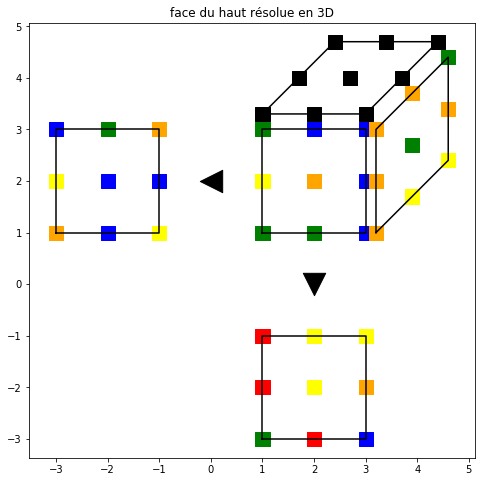

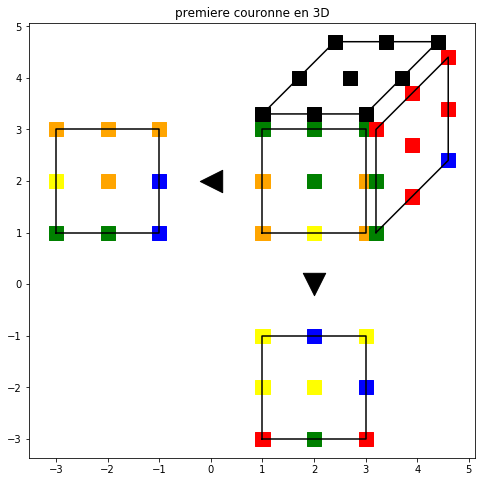

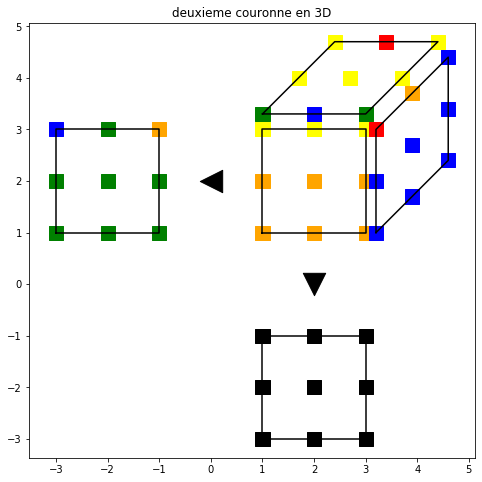

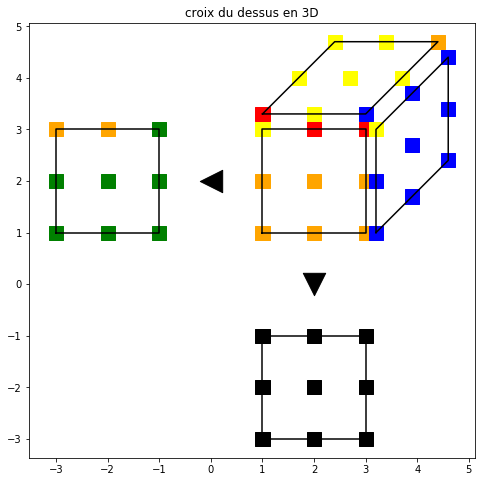

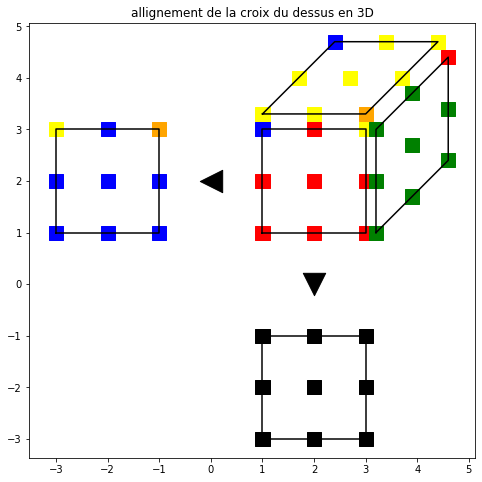

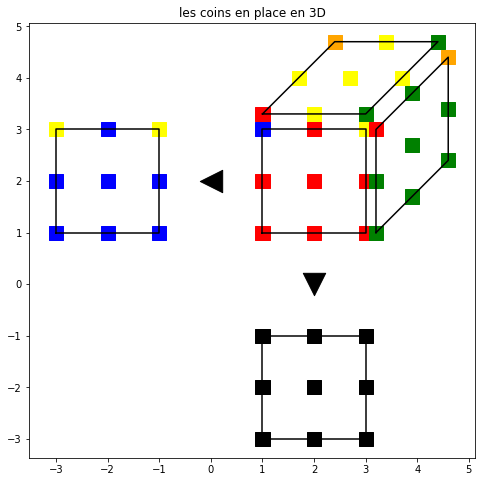

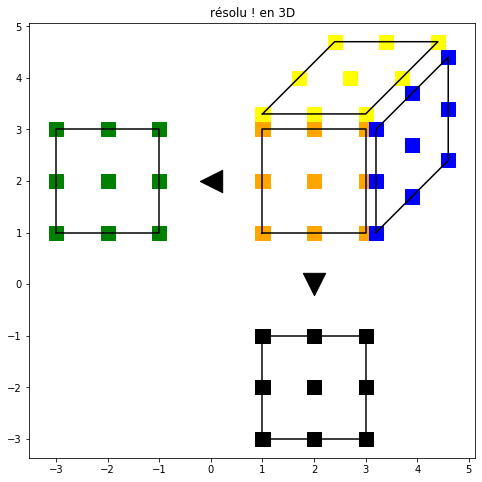

temps d'execution : 2.1457103000138886


In [1676]:
tab = []
t1 = time.clock()
for i in range(1):
    r = RubiksCube3x3('r','w')
    #r.plot_rubiks('debut')
    r.shakeRandom(1000,False)
    c  = r.returnRubiks()
    cd = r.returnRubiksDeepcopy()
    r.resolution(True)
    res = r.checkResolu()
    if not res:
        r.plotRubiks('probleme de resolution '+str(i))
    tab.append(res)
    
t2 = time.clock()
print("temps d'execution :",t2-t1)

In [1467]:
tab = []
t1 = time.clock()
nb = 1000
for i in range(nb):
    r = RubiksCube3x3('r','w')
    #r.plot_rubiks('debut')
    r.shakeRandom(1000,False)
    c  = r.returnRubiks()
    cd = r.returnRubiksDeepcopy()
    r.resolution(False)
    res = r.checkResolu()
    if not res:
        r.plotRubiks('probleme de resolution '+str(i))
    tab.append(res)
    
t2 = time.clock()
print("temps d'execution :",t2-t1)
print("temps d'execution moyen pour une iteration :",(t2-t1)/nb,'s')
print("nombre d'erreurs sur les",nb,'resolution aléatoires :',nb-sum(tab))

temps d'execution : 92.98025729999063
temps d'execution moyen pour une iteration : 0.09298025729999063 s
nombre d'erreurs sur les 1000 resolution aléatoires : 0


In [1431]:
sum(tab)

10000

sur les 10 000 résolutions lancés, elles ont toutes étés réussis, avec un temps moyen :

In [1432]:
print('temps de résolution moyen :',913/10000,'s')

temps de résolution moyen : 0.0913 s


A continuer : améliorer l'interface en ajoutant un paramètre modifiable a tout moment (interact k) pour chosir la face de devant !